# Phase 1 Code Challenge Review 

_November 4, 2020_ 

TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [4]:
# import data from a file 
df = sns.load_dataset('iris')
# using seaborn

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')
# using pandas

In [5]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# examine the dimensions of it
# how many rows and columns
df.shape

(150, 5)

In [11]:
# check to see if you have missing values
print(df.isnull().sum())
print("There are no null or missing values.")

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
There are no null or missing values.


In [12]:
# introduce some missing values
df.iloc[2:10,1:3] = np.nan

In [15]:
print(df.isnull().sum())
print("There are now some missng values.")

sepal_length    0
sepal_width     8
petal_length    8
petal_width     0
species         0
dtype: int64
There are now some missng values.


In [16]:
# drop them by certain columns
df.dropna(subset = ['sepal_width'], axis = 0, inplace = True)
# we didn't modfiy our og df. 
# our og df still has the missing values in it
# inplace = True makes it permenant

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_length_10'] = df['sepal_length'] * 10

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
2,4.7,NaN,NaN,0.2,setosa,47.0,47.0
3,4.6,NaN,NaN,0.2,setosa,46.0,46.0
4,5.0,NaN,NaN,0.2,setosa,50.0,50.0


In [20]:
# another way?
df['sepal_length_10_lambda'] = df['sepal_length'].apply(lambda x: x*10)

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
2,4.7,NaN,NaN,0.2,setosa,47.0,47.0
3,4.6,NaN,NaN,0.2,setosa,46.0,46.0
4,5.0,NaN,NaN,0.2,setosa,50.0,50.0


#### 2. Data Visualization

In [26]:
# how many species are there, and how many flowers are in each species
df['species'].nunique()
# idk what they are and how many observations are in the species

3

In [27]:
df['species'].unique()
# we have the name of the species but we need how many flowers are in each species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
petal_length_by_sp = df.groupby(['species']).count()
# we needed to use group by
petal_length_by_sp

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_lambda
species,,,,,,
setosa,50,42,42,50,50,50
versicolor,50,50,50,50,50,50
virginica,50,50,50,50,50,50


In [30]:
df.groupby(['species']).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [32]:
# let's plot the average pedal length for each species of iris 
df.groupby(['species'])['petal_length'].mean()

species
setosa        1.461905
versicolor    4.260000
virginica     5.552000
Name: petal_length, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

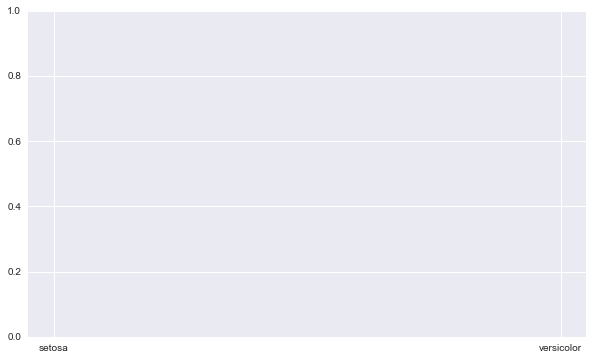

In [38]:
y = petal_length_by_sp
x = petal_length_by_sp.index
figure, ax = plt.subplots(figsize = (10,6))
ax.bar(x, y) 
# what is the x and y? 
# x = index
# y = y
ax.set_title('avg petal length')
ax.set_xlabel('species')
ax.set_xticks([1,2,3])
ax.set_xticklabels(['flower1','flower2','flower3'])

In [ ]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)


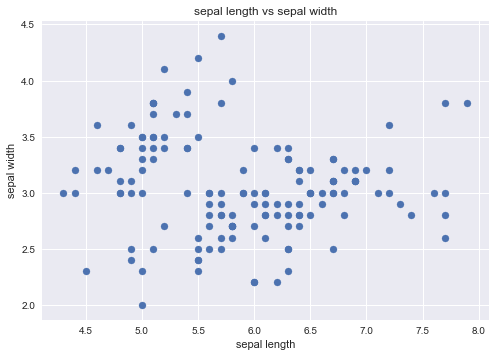

In [33]:
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('sepal length vs sepal width')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

x = df.sepal_length
y = df.sepal_width

ax.scatter(x, y)

In [ ]:
df.corr()

Can you describe the relationship above?

#### 3. Statistics 

In [47]:
# calculate the mean and median value for sepal length 
print(df['sepal_length'].mean())
print(df['sepal_length'].median())
print(df['sepal_length'].agg(['mean', 'median']))

5.843333333333334
5.8
mean      5.843333
median    5.800000
Name: sepal_length, dtype: float64


In [ ]:
# what can you say about the distribution of sepal length and sepal width based on this distribution? 

In [61]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
2,4.7,NaN,NaN,0.2,setosa,47.0,47.0
3,4.6,NaN,NaN,0.2,setosa,46.0,46.0
4,5.0,NaN,NaN,0.2,setosa,50.0,50.0


In [49]:
# which flower has the longest pedal? what is the species of that flower
df.groupby(['species'])['petal_length'].max()

species
setosa        1.9
versicolor    5.1
virginica     6.9
Name: petal_length, dtype: float64

In [58]:
# how do we get the specific index for the max peal length
df.sort_values(by = 'petal_length') 
# petal length is sorted from shortest to longest now

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
22,4.6,3.6,1.0,0.2,setosa,46.0,46.0
13,4.3,3.0,1.1,0.1,setosa,43.0,43.0
14,5.8,4.0,1.2,0.2,setosa,58.0,58.0
35,5.0,3.2,1.2,0.2,setosa,50.0,50.0
42,4.4,3.2,1.3,0.2,setosa,44.0,44.0
...,...,...,...,...,...,...,...
5,5.4,NaN,NaN,0.4,setosa,54.0,54.0
6,4.6,NaN,NaN,0.3,setosa,46.0,46.0
7,5.0,NaN,NaN,0.2,setosa,50.0,50.0
8,4.4,NaN,NaN,0.2,setosa,44.0,44.0


In [59]:
df.sort_values(by = 'petal_length', ascending = False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


In [62]:
# use logical subset
df[df.petal_length == df.petal_length.max()]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


#### 4. Python Data Structure 

In [64]:
get_money = {'get':
            [{'get':[{
                'get':'money'
            }]}]}

In [69]:
# get the money 
get_money['get'][0]['get'][0]['get']

'money'

In [72]:
get_money['get']

[{'get': [{'get': 'money'}]}]

In [73]:
get_money['get'][0]

{'get': [{'get': 'money'}]}

In [74]:
get_money['get'][0]['get']

[{'get': 'money'}]

In [75]:
get_money['get'][0]['get'][0]

{'get': 'money'}

In [76]:
get_money['get'][0]['get'][0]['get']

'money'

In [78]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon Cat',
        'attribute': ['Alert','Independent','Playful']
    }],
    'Joe Rogan': [{
        'age': 8,
        'type': 'Parrot',
        'attribute': ['Loud','Opinionated','Annoying']
    }],
    'Rick Astley': [{
        'age': 2,
        'type': 'Labrador',
        'attributes': ['never','gives','you','up']
    }]}]
}    

In [97]:
# explore the structure of dictionary
groomer_info['pets']
# its a list, so get the first elment

[{'Ginger': [{'age': 5,
    'type': 'Pitbull',
    'attribute': ['Playful', 'Cheery', 'Hyper']}],
  'Chloe': [{'age': 1,
    'type': 'Maine Coon Cat',
    'attribute': ['Alert', 'Independent', 'Playful']}],
  'Joe Rogan': [{'age': 8,
    'type': 'Parrot',
    'attribute': ['Loud', 'Opinionated', 'Annoying']}],
  'Rick Astley': [{'age': 2,
    'type': 'Labrador',
    'attributes': ['never', 'gives', 'you', 'up']}]}]

In [96]:
# create a list of names containing all pets' names
pet_names = []
for pet in groomer_info['pets'][0].keys():
    print(pet, type(pet))
    pet_names.append(pet)
pet_names

Ginger <class 'str'>
Chloe <class 'str'>
Joe Rogan <class 'str'>
Rick Astley <class 'str'>


['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

In [99]:
list(groomer_info['pets'][0].keys())

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

In [109]:
#  create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']
pet_types = []
for name in pet_names:
    types = groomer_info['pets'][0][name][0]['type']
    pet_types.append(types)
print(pet_types)
    

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']


In [ ]:
# create a list that contain all pets age 
groomer_inf

In [ ]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare
def pets_older_than(groomer_info, age):
    pass

In [ ]:
pets_older_than(groomer_info,4)
>>> ['Ginger','Joe Rogan']

syntax of list comprehension: [expression for item in collection if xxx else xxx]
for example:
[i*2 for i in list]